# Automation of Attendance System to Recognize a Human Frontal Face With and Without Masks

### Imports

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt
import dlib
from PIL import Image
import numpy as np
import imutils
import cv2
import csv
import os
from datetime import datetime

In [ ]:
# Face landmarks file downloaded from Google Drive
!gdown 1vBj1vzey3he60knabhQ7gBA2bAF_26Pc

Downloading...
From: https://drive.google.com/uc?id=1vBj1vzey3he60knabhQ7gBA2bAF_26Pc
To: /content/shape_predictor_68_face_landmarks.dat
100% 99.7M/99.7M [00:01<00:00, 75.5MB/s]


In [ ]:
# Mask landmarks file and mask image downloaded from Google Drive
!gdown 1T_R0r2xBPmpgt_Aij-LVpruJYb29fDge

Downloading...
From: https://drive.google.com/uc?id=1T_R0r2xBPmpgt_Aij-LVpruJYb29fDge
To: /content/mask.zip
100% 1.06M/1.06M [00:00<00:00, 102MB/s]


In [ ]:
!unzip /content/mask.zip

Archive:  /content/mask.zip
  inflating: blue_mask.png           
  inflating: landmark_mask.csv       


In [ ]:
!gdown 18YWFNZvBNZ12JClDrze2UgqvUsZi36Hq

Downloading...
From: https://drive.google.com/uc?id=18YWFNZvBNZ12JClDrze2UgqvUsZi36Hq
To: /content/cvdataset.zip
100% 136M/136M [00:01<00:00, 123MB/s]


In [ ]:
!unzip /content/cvdataset.zip

Archive:  /content/cvdataset.zip
   creating: cvdataset/Andac Akpulat/
  inflating: cvdataset/Andac Akpulat/cvdataset1.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset10.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset11.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset12.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset13.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset14.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset15.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset16.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset17.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset18.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset19.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset2.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset20.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset3.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset4.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset5.jpg  
  inflating: cvdataset/Andac Akpulat/cvdataset6.jpg  


In [ ]:
!gdown 14Xrdyol2JvBRgrCV-tnNoKvziWp7aF3Y

Downloading...
From: https://drive.google.com/uc?id=14Xrdyol2JvBRgrCV-tnNoKvziWp7aF3Y
To: /content/dataset_Imagelabeling.csv
100% 25.8k/25.8k [00:00<00:00, 40.8MB/s]


# Data Acquisition and Preparation
In the project, a dataset consisting of unmasked faces was used. However, in order for our system to detect the person while wearing a mask, it was necessary to put a mask on each face in the dataset.

To achieve this, an algorithm was created that takes each image in our dataset, detects and cuts out the face from the image and puts a mask on it.

## Data characteristics and statistics
The dataset was created by us. It consists of images of our relatives, friends, and ourselves. The characteristics of the pictures are as follows:


* The dataset consists of front views of all faces.
* These are images of faces with a closed mouth or a slight smile
* All of the images are colour images.
* Images were captured using a variety of backgrounds.

In addition, since the pictures are taken from different kinds of cellphones, the sizes and resolutions of the images also vary.

The dataset contains face images of 18 individuals and there are 20 images for each individual. In total, there are 360 images.


## Data visualisation
Our dataset is solely formed of images. As a sample, a couple of the images are displayed below:


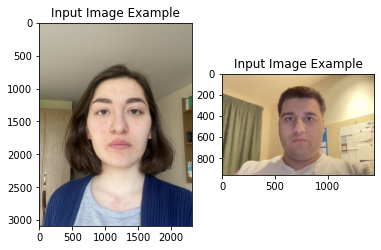

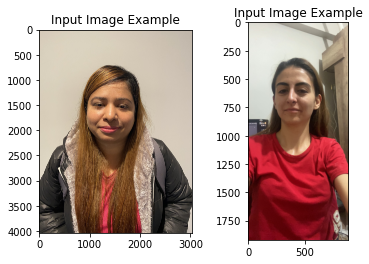

In [ ]:
img = cv2.imread('/content/cvdataset/Gokce Bekar/cvdataset141.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('/content/cvdataset/Andac Akpulat/cvdataset13.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread('/content/cvdataset/Neha Keer/cvdataset221.jpeg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img4 = cv2.imread('/content/cvdataset/Cagla Demirkol/cvdataset107.jpeg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.subplot(121), plt.imshow(img), plt.title('Input Image Example')
plt.subplot(122), plt.imshow(img2), plt.title('Input Image Example')
plt.show()

fig = plt.figure()
plt.subplot(121), plt.imshow(img3), plt.title('Input Image Example')
plt.subplot(122), plt.imshow(img4), plt.title('Input Image Example')
plt.show()

In addition to the dataset, there is also a mask image. A blue mask was chosen for our project. The background was removed from the mask image before it was uploaded to the system. The image of the mask is as follows:

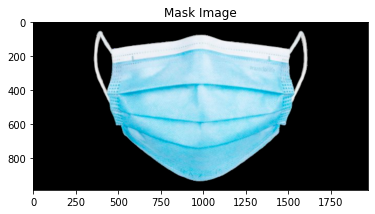

In [ ]:
imgMask = cv2.imread('/content/blue_mask.png')
imgMask = cv2.cvtColor(imgMask, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.imshow(imgMask), plt.title('Mask Image')
plt.show()

In [ ]:
!gdown 1V0CMDDCdydxQlghy5Ew2swXp3-Jsprpt

Downloading...
From: https://drive.google.com/uc?id=1V0CMDDCdydxQlghy5Ew2swXp3-Jsprpt
To: /content/exampleImgLandmark.zip
100% 230k/230k [00:00<00:00, 91.7MB/s]


In [ ]:
!unzip /content/exampleImgLandmark.zip

In the project, it was first desired to place a mask on the face using the Haar cascade classifier. It is a technique based on machine learning in which a cascade function is trained using a large number of positive and negative pictures. This model is an efficient way of detecting objects (OpenCV: Cascade Classifier, 2022). 

This classifier was firstly wanted to be used to detect the mouth part in the face image. After the mouth in the picture is detected, it was aimed to place a mask on the face according to the position of that mouth in the picture. however, when planning this, the nose and cheeks were not taken into account. Therefore, when the face position in the picture looks slightly turned to the right or left, the mask does not fit the face properly. In this case, when the dataset is created with this method, the mask will be placed incorrectly in some photos, and the photos will not look realistic. 

As a result, it was decided to use the homography method, which we thought we could get better results.

## Annotation of Mask Image

Before starting the data preprocessing, significant key points in the mask were annotated. The purpose of this is to place the desired points of the mask in such a way that they exactly coincide with the desired parts of the face.

ImgLab - Image Annotation tool is used for the annotation process of mask image. A photograph from this process is shown below:

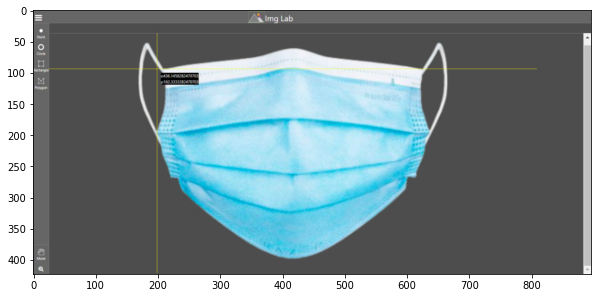

In [ ]:
imgMaskAnnotation = cv2.imread('/content/maskAnnotation.jpg')
imgMaskAnnotation = cv2.cvtColor(imgMaskAnnotation, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 10))
plt.imshow(imgMaskAnnotation)
plt.show()

These key points were saved to the computer as a .pts file. Then, these values are saved in a CSV file so that they can be processed easily in python. The final version of the CSV file is displayed below:

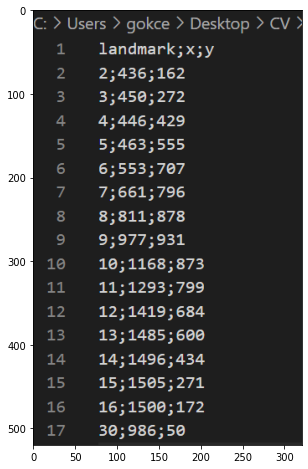

In [ ]:
imgMaskLandm = cv2.imread('/content/landmarkMask.png')
imgMaskLandm = cv2.cvtColor(imgMaskLandm, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8, 8))
plt.imshow(imgMaskLandm)
plt.show()

The purpose of using homography in this project is to identify the transformation between key points that match. Thus, the mask will be properly put on the face. The key points obtained from the mask should be matched with the face landmarks. To achieve this, shape_predictor_68_face_landmarks.dat file is used.  It is a model that is able to detect 68 important points on a human face (dlib documentation, 2013). The key points to be obtained from the face are visualized in the following line:

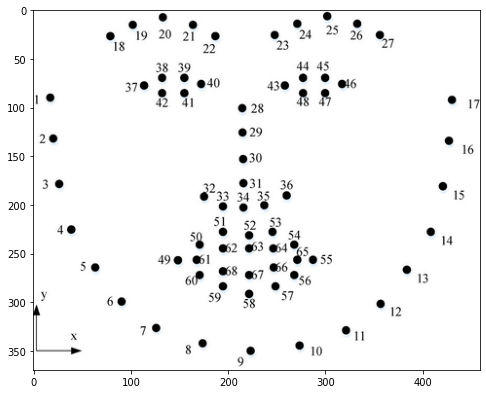

In [ ]:
imgFaceLandm = cv2.imread('/content/faceCV.jpg')
imgFaceLandm = cv2.cvtColor(imgFaceLandm, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8, 8))
plt.imshow(imgFaceLandm)
plt.show()

Figure: The Face Shape Landmarks (Facial expression recognition based on Electroencephalogram and facial landmark localization, 2019)

## Data Processing

After the data set was collected, it was labelled for each person according to their names and split into separate files.

The preprocess step consists of following steps:

1. Resizing all images to the same size
2. Placing annotated masks on the faces in the pictures

For these operations, dlib, PIL and cv2 libraries are used.

Firstly, images are loaded from zip file. Then, the actual processing operations started to be applied to all of the images.

dlib's shape_predictor object returns a series of point positions defining the object's pose (Classes — dlib documentation, 2013). It was used to predict the shape of a face on images. As a parameter variable, shape_predictor_68_face_landmarks.dat file is used. At the end of this process, the positions of the critical points including the eyes, brows, nose, mouth, and jawline on the face in an image are obtained.

dlib's get_frontal_face_detector object returns a face detector and was used to detect faces on an image (Classes — dlib documentation, 2013). The faces in the image were recognised using this approach, and the image was cropped to include these facial features using the PIL library's crop function.

Python's os module was used when making changes to the location of files or images. os module offers a portable approach for using operating system dependent functionality (os — Miscellaneous operating system interfaces — Python 3.10.4 documentation, 2022). With the help of the chdir function of os module, after cropping the pictures and putting masks on the pictures, they were saved in the desired folders since function changes the current directory to the desired path.

Furthermore, OpenCV's findHomography function was used for finding the perspective transformation between two images (OpenCV: Camera Calibration and 3D Reconstruction, 2022). It helped to generate a new masked face picture that the mask is put over the appropriate landmark points of the face.

Afterwards, the perspective transformation is applied to images with the warpPerspective function (OpenCV: Geometric Image Transformations, 2022). It transforms the main image using that specified matrix got from findHomography function.


faceDetection function takes an image as input. The faces in the specific picture were detected with the help of the get_frontal_face_detector function of dlib library. Each face detected in the picture was indicated in a square, as if its position. At the end, the function returns the obtained position. Since our system process an image containing a single face for each time, the function will always recognise a single face at a time and construct a bounding box for that face only.

In [ ]:
# Create variable for face shape predictor
shape_predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

In [ ]:
def faceDetection(inputImage):
    ''' The function detects the faces in given images '''
    detectFaces = dlib.get_frontal_face_detector()
    foundFaces = detectFaces(inputImage)
    
    for eachFace in foundFaces:
      boundingBoxFace = [(eachFace.left(), eachFace.top(), eachFace.right(), eachFace.bottom())]

    return boundingBoxFace

The croppedFace function takes a certain picture and the path where the picture is to be saved after processing, as inputs. The image was uploaded with the imread function of OpenCV. The color of the picture was changed with the help of the cvtColor function. Afterwards, the face in the picture was detected with the faceDetection function that we have created before. After obtaining the positions of the face in the picture, the face was cropped with the crop function in the PIL library. 

In addition, all images have been resized. The width and height values of the images were set to 350 by 350. These values were determined to be large enough to perform face detection. Finally, The cropped image was then saved in the desired location.

In [ ]:
def croppedFace(pathtoImage, directoryImg):
    ''' The function detects the face and crops it according to face coordinates '''
    faceImage = cv2.imread(pathtoImage)
    faceImage = cv2.cvtColor(faceImage,cv2.COLOR_BGR2RGB)
    detectFace = faceDetection(faceImage)

    for face_x_y_coordinates in detectFace:
      # Crop the face according to face's x and y coordinates
        faceFinal = Image.fromarray(faceImage).crop(((face_x_y_coordinates[0]-10), (face_x_y_coordinates[1]-10), (face_x_y_coordinates[2]+10), (face_x_y_coordinates[3]+10)))        
    
    # Save the cropped image to same direction
    os.chdir(directoryImg)
    resizeImg = faceFinal.resize((350, 350))
    if pathtoImage == '/content/photo.jpg':
      resizeImg.save('final.jpg')
    else:
      resizeImg.save(pathtoImage)
    
    return (pathtoImage)

The getfaceMask function takes a mask image as input, loads the image and makes it suitable for processing with NumPy array.

The getFaceMaskLandmark function takes the CSV file containing the edge points of the mask as input and saves these points to the array.

In [ ]:
def getfaceMask(mask):
    ''' The function reads the mask image '''
    maskImage = cv2.imread(mask, -1)
    finalMask = maskImage.astype(np.float32) / 255.0

    return finalMask

def getFaceMaskLandmark(mask):
    ''' The function reads the mask landmarks '''
    with open(mask) as csvFile:
      points = []
      csvFileFinal = csv.reader(csvFile, delimiter = ";")

      for line in csvFileFinal:
          try:
              points.append(np.array([int(line[1]), int(line[2])]))
          except:
              continue

    points = np.array(points)
    return points

The getFaceLandmarks function detects the face in the image with the help of the dlib library and the shape_predictor_68_face_landmarks model and records the positions of the important points of the face.

In [ ]:
detectFaces2 = dlib.get_frontal_face_detector()

def getFaceLandmarks(faceImg):
    ''' The function reads the face landmarks '''
    image = cv2.imread(faceImg)
    faces = detectFaces2(image)

    pts = []
    global landmarksFace
    
    for face in faces:
        landmarksFace = shape_predictor(image, face)
    
    #Covering the area of the face between landmarks 2 and 16 and 30
    for a in range(1, 16):
        point = [landmarksFace.part(a).x, landmarksFace.part(a).y]
        pts.append(point)

    pts.append([landmarksFace.part(29).x, landmarksFace.part(29).y])

    finaltPts = np.array(pts)

    return image,finaltPts

The last function created was Masked Face Image. This function was created to put a mask on each face in the dataset. 

In [ ]:
def MaskedFaceImage(image,source,destinaton,maskCSV):
    ''' The function overlays mask to the face '''
    copyImg = image.copy()
    copyImg = copyImg.astype(np.float32)
    copyImg = copyImg / 255.0

    X, _ = cv2.findHomography(source, destinaton)
    transformMask = cv2.warpPerspective(maskCSV, X, (copyImg.shape[1], copyImg.shape[0]), None)

    for w in range(0, 3):
        copyImg[:, :, w] = ( (transformMask[:, :, 3]) * transformMask[:, :, w] + (1.0 - transformMask[:, :, 3]) * copyImg[:, :, w] )

    result = cv2.cvtColor(copyImg, cv2.COLOR_BGR2RGB)
    
    return result

After all the functions required to preprocess the data have been created, the preprocessing stage was started. All images in the dataset were preprocessed using the CSV file containing the mask image and the edge points of the mask.

This function takes an image from the dataset, the blue mask image and landmarks of these two images as input. The function saves unmasked cropped images and masked cropped images to the desired location.

In [ ]:
os.chdir('/content')

blueMask = getFaceMaskLandmark('/content/landmark_mask.csv')
blueMaskLandmark = getfaceMask('/content/blue_mask.png')

for filename in os.listdir('/content/cvdataset'):
  for x in os.listdir(os.path.join('/content/cvdataset', filename)):
    a = (os.path.join('/content/cvdataset', filename))
    b = (os.path.join(a, x))

    try:
      b = croppedFace(b, a)
      faceImg, faceLandmark = getFaceLandmarks(b)

      os.chdir(a)
      finalImg = MaskedFaceImage(faceImg,blueMask,faceLandmark,blueMaskLandmark)
      resultImg = cv2.cvtColor(finalImg, cv2.COLOR_BGR2RGB)

      cv2.imwrite(b+'_mask.jpg',255*resultImg)
    except:
      pass

print('Preprocess is done')

### Data Output
After the images were resized and put masks on the faces in the images, the data was ready to be used to create the model. At the end of the processing stage, 840 images (with and without masked images) were ready for model creation. As a sample, a couple of the processed images are displayed below:

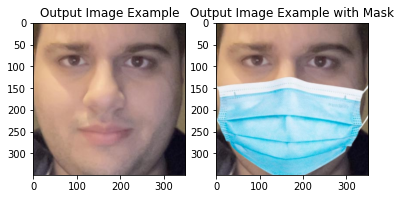

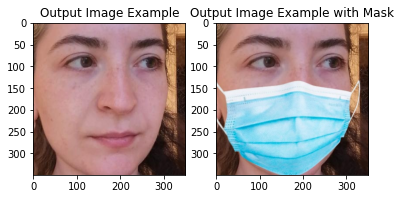

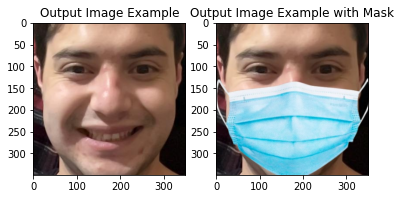

In [ ]:
img = cv2.imread('/content/cvdataset/Andac Akpulat/cvdataset18.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('/content/cvdataset/Andac Akpulat/cvdataset18.jpg_mask.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread('/content/cvdataset/Ozge Bekar/cvdataset242.jpeg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img4 = cv2.imread('/content/cvdataset/Ozge Bekar/cvdataset242.jpeg_mask.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

img5 = cv2.imread('/content/cvdataset/Levent Baksi/cvdataset181.jpeg')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

img6 = cv2.imread('/content/cvdataset/Levent Baksi/cvdataset181.jpeg_mask.jpg')
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.subplot(121), plt.imshow(img), plt.title('Output Image Example')
plt.subplot(122), plt.imshow(img2), plt.title('Output Image Example with Mask')
plt.show()

fig = plt.figure()
plt.subplot(121), plt.imshow(img3), plt.title('Output Image Example')
plt.subplot(122), plt.imshow(img4), plt.title('Output Image Example with Mask')
plt.show()

fig = plt.figure()
plt.subplot(121), plt.imshow(img5), plt.title('Output Image Example')
plt.subplot(122), plt.imshow(img6), plt.title('Output Image Example with Mask')
plt.show()

# Attendance

Using the code from Colab's code snippet, images will be captured from the computer's webcam. The captured images will be saved to the desired location and with these images, predictions of users' identities will be made using the trained model.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  os.chdir('/content')
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
os.mkdir('/content/predict')
os.mkdir('/content/predict/predictUser')

When the attendance process starts, the system continues to record the attendance of the people until it is stopped by the user. 

The system prompts the user with, Do you want to continue? If so, enter 'y', otherwise, enter 'q', question. 

When the user answers 'y' on the keyboard, the system continues to take pictures with the camera and records the names and recording times of the people it detects in the text file.

When the user answers 'q' on the keyboard, the system stops the recording and saves the final version of the text file.

In [ ]:
# attandenceFile created to keep records of users
os.chdir('/content')
attandenceFile = open("CV_attandance.txt","w+")

In [ ]:
inp = ''

while True:
  if inp == 'q':
    print('You quit the attandence system')
    break
  else:
    try:
      filename = take_photo()
      croppedFace('/content/photo.jpg', '/content/predict/predictUser')
      print('Face Predicted')
      attandenceFile.write("Name: " + "Time: " + str(datetime.now()) + '\n')
    except:
      print('Error')
  inp = input('Do you want to continue? If so, enter \'y\', otherwise, enter \'q\')\n')
  inp = inp.lower()

attandenceFile.close()

In [ ]:
os.chdir('/content')


In [ ]:
#!zip -r /content/cvdataset2 /content/cvdataset

In [ ]:
!gdown 1C5S4iHn7dROCmHCLX1oM6JWc-TiP3KGs

In [ ]:
!unzip /content/cvdatasetforsvm.zip

In [ ]:
path = r'/content/content/cvdataset'

In [ ]:
# dataset_Imagelabeling file
!gdown 1o_paMic4p478pIg4lzicsRTO8WqGFKYi


# SVM Model for Image classification

This section of the paper suggests facial recognition techniques using PCA (Principal Component Analysis) features extraction and SVM (Support Vector Machine) image classifier. The suggested method was tested on a manually created human face picture dataset, and the findings show that it can achieve high recognition efficiency.

Principal Component Analysis (PCA) is an unsupervised algorithm used for dimensionality reduction and data visualization to train machine learning algorithm. It filters out the noise and keeps only the relevant features that capture as much information as possible. It uses variance to measure the importance of the dimension: higher the variance is considered a principal component whereas lower variance is treated as noise. PCA uses randomized SVD (Singular Value Decomposition) which is an extension of PCA. Conventional PCA works on data points and features whereas Randomized PCA works on the number of principal components. 

The PCA technique was employed for recognition, which is a statistical approach that works with pure mathematical matrixes rather than image processing like the color-based detection technique (Jha 2007). PCA may be used for detection as well. PCA (Principal Component Analysis) is a face recognition approach that uses several orthogonal transformation procedures to turn a correlated training set of variables into principal modes of variation (Charity et al. 2017).

In 1963, Vladimir N. Vapnik and Alexey Ya. Chervonenkis developed the SVM algorithm. He lacked the necessary instruments, but now we have powerful machines capable of running algorithms. In 1992, he went to numerical analysis experts and did some powerful estimations to evaluate how powerful SVM is. Bernhard Boser, Isabelle Guyon, and Vladimir Vapnik proposed a method for creating nonlinear classifiers using the kernel trick on maximum-margin hyperplanes in 1992. Corinna Cortes and Vapnik suggested the "soft margin" incarnation, which is often used in software packages, in 1993, and it was published in 1995 (Cortes and Vapnik 1995). Post SVM all other theorems like K-nearest neighbors, Decision trees, and Naive Bayes classifier got introduced.  
Another model of the machine learning algorithm is generative where features are getting predicted based on class, whereas SVM is called discriminative because class gets predicted based on features. It is the difference that SVM creates from other machine algorithms is that it creates a separative hyperplane. The classification problem tries to create boundaries between the classification points. SVM creates separative space between the two classes. SVM kernels.

SVM became powerful due to two main concepts, one is the base concept of SVM creating the separate hyperplane and the second concept is the kernel concept. 

SVM is the model/algorithm part of the scikit-learn library which is the widely used library for implementing machine learning algorithms. The Support Vector Classifier (SVC) is employed to implement the SVM. The SVC is imported from SVM for our classification problem and handles multiclass support. The main objective of SVM algorithm is to divide the datasets into the number of classes to find the maximum marginal hyperplane which can be done by generating hyperplanes iteratively that separate classes and then choosing the correct hyperplane that segregates the classes. Support vectors are the data points that are closest to the hyperplane which helps to decide the separating line, Hyperplane is the decision plane that divides the classes and the Margin is the gap between the different classes based on the closest datapoints. SVM has the unique capability of minimising the empirical classification error while also maximising the geometric margin (Ahmedi and Nandyal 2015).

In the SVM library of scikit-learn, we can find kernels that are transformation function of points into another space where separation becomes easier such as Linear kernels which would perform the linear transformation of points into another space, Radial Bias Function kernel would take into Pi theta transformation and Polynomial kernels is using polynomial transformation points. The separation might not always be linear, a straight line cannot be formed at times. Sometimes we need non-linear separation for that we need non-linear kernels like Radial Bias Function kernel and Polynomial kernels but there exist other kernels like fisher kernel, and Gaussian kernel as well. 

From the scikit-learn library, we have used GridSearchCV and train and test split functions for model selection. GridSearchCV helps to loop through hyperparameters to fine tune the hyperparameter of the model. Every combination of values of the grid gets tried to find the best value for the hyperparameters depending on what parameters got passed. To find the optimal value is a time-consuming and slow process because of the number of hyperparameters involved. Estimator is the model instance to check the hypermeters and param_grid (ParameterGrid) is an object that contains all parameters we want to try. We have used ‘C’ and ‘gamma’ parameters to control the error and decide on how much curvature we want in decision boundary respectively. 
GridSearchCV(estimator=model, param_grid=param_grid,)

The train_test_split function helps to split the dataset into two subsets: train data and test data using which testing can be done on the model and predictions can be made based on the trained model. 
We have created a loop and used the os (Operating System) module to walk through the folder path in order to import images from the labelled folder of each person in the main folder. Images were converted into grayscale format and added into an array after normalization. PIL (Python Imaging library) library has been used to import an image. Imported time library to estimate the processing time of SVM classification model. best_estimator is the estimator chosen by the search based on highest score. 



FORMULATION OF SVM:
Let's start with a strictly linearly separable example, in which the data A+ and A are separated by a hyperplane. A pair of parallel boundary planes can be used to separate the two classes in this example (Lee et al. 2012): 
w⊤x + b = +1
w⊤x + b = −1,

where w is the normal vector of these planes and b is their relative position to the origin The class A+ is bound by the first plane, while the class A is bound by the second plane.
 
Fig. 1. The illustration of linearly separable and non-separable SVM

w⊤x + b ≥ +1, for x ∈ A+,
w⊤x + b ≤ −1, for x ∈ A−.

SVM reaches stronger prediction when the margin between the two bounding planes is maximized. Therefore, SVM searches for a hyperplane by maximizing 2/‖W‖_2 . The linear separating hyperplane is the plane

wT x + b  0

We achieve an optimum solution (w*, b*) by maximising the margin between the bounding planes. Support vectors are the data points on the bounding planes, w*T x+b* = 1. We only need to store the support vectors in our databases once we receive the training results. If the two classes are linearly inseparable, the two planes are confined by a soft margin (Lee et al. 2012) (Anand 2016) given by a non-negative slack vector variable ξ, as follows:

wT xi + b + ξ  +1, for xTi  A+
wT xi + b - ξ  -1, for xTi  A-

Several datasets couldn't be well separated by using a linear setting apart hyperplane, even after employing a soft margin, but they can be linearly separated if mapped onto a better or much better dimensional region by using a nonlinear map. rather than translating specific functions to a larger size This is accomplished using the kernel technique. The kernel computes the dot product, which would be far more expensive to compute explicitly in any other scenario. Linear, Polynomial, Radial Basis Function (RBF), and Multi-Layer Perceptron are some of the most often utilised Kernel functions (MLP). We are able to make use of RBF, which is provided by:
k(ϰ,z)=exp⁡(-‖x-z‖^2/(2γ^2 ))

## Importing useful Python Libraries

In [ ]:
from time import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import os
import numpy as np
import pandas as pd
from PIL import Image

Initializing variable for source folder path

In [ ]:
#path = r'C:\Users\nehak\Desktop\Computer Vision\Final dataset\cvdataset'

##Loading images and Pre-processing

Initializing two variables with blank list where one variable will capture all the images from the source folder and second variable will store all images after doing pre-process work.

Using walk() method of Operating system (os) module, directory scanning is happening in bottom-up way and adding each image to the variable.

The loop function is defined to iterate through the length of the variable and open and identifies the image using Image.open() function.

Converting images to Grayscale using convert() function combined with 'L' mode to reduce the dimension from three color channel (three dimensions) to grayscale (unidimensional) and reduce complexity by giving less inputs to the model.

Now, resize the images using resize() function based on the width and height passed to the function.

Normalize the images by dividing the image by 255 where 255 is the pixel value which will convert the range from 0 to 1. The smaller the number, better the computation.

After normalization, add processed images using append() function in the variable.

In [ ]:
X, P = [], []                                                  #blank variables got initialized

for root, directories, files in os.walk(path, topdown=False):  #using walk() method of os module scanning directories from bottom-up
    for name in files:
        P.append(os.path.join(root, name))                     #appending and adding each image to P variable to the end of the list
for i in range(len(P)):                                        #loop function defined to iterate through the length of the variable
    image_dir = P[i]
    img = Image.open(image_dir).convert('L').resize((350,350)) #Opening images from path, converted to grayscale and desired size
    img = np.array(img)                                        #Converting images into array
    img = img/255                                              #normalizing the images
        
    X.append(img)                                              #appending each image to X variable

Checking the length of variable X where all images are stored and converting them into array using asarray() function of the numpy library.

Using type() function, checking the type of the object.

In [ ]:
len(X)

In [ ]:
X = np.asarray(X)

In [ ]:
type(X)

## Labeling the images 

Reading the csv file where labels are defined for each with mask and without masks images

Once the file loaded, converting the list into array

In [ ]:
labels = pd.read_csv("/content/dataset_Imagelabeling.csv")

In [ ]:
Y = np.array(list(labels['label']))

In [ ]:
Y

In [ ]:
len(Y)

## Compute PCA on face dataset

PCA is the unsupervised feature extraction/dimensionality reduction. Dimensions are the features, in this instance pixels that represent the data. PCA helps turning high-dimensional data into a low-dimensional principal component.

RandomizedPCA has been used to reduce the dimensionality of the dataset. In this instance, n_components has been selected as 100 which explains that we have used 75 features to train our model. Whiten parameter has been set to True to remove correlation between features. random_state parameter has been passed to ensure random numbers are generated in the same order.
By adjusting the features, better accuracy can be attained as shown below. 

Using 50 features, accuracy is 91%

Using 75 features, accuracy is 94%

Using 100 features, accuracy is 93%

Using 150 features, accuracy is 92%


SVC (Support Vector Classification) is the class of SVM (Support Vector Machine) algorithm that is capable of performing multi-class classification on a dataset. RBF (Radial Basis Function) kernel has been used here as it works on non-linear problems which makes linear decision region. It will combine the features in non-linear ways to uplift the samples to a higher-dimensional feature space where you may apply a linear decision boundary to divide your classes. class_weight has been set as 'balanced' as it helps to balance the imbalance classes of the dataset. The model will automatically assigns the class weigths which is inversely proportional to their respective frequencies (balancing out the imbalance in the class).

make_pipeline() function will combine several steps that can be cross-validated together while setting different parameters.

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = RandomizedPCA(n_components=75, whiten=True, random_state=80)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
X = X.reshape(X.shape[0], -1)

## Splitting the dataset into train and test subsets

Dataset is getting split into train and test subsets where X (input) is the image data and Y (output) is the image label. In this instance, we have split the dataset into 80% for train and 20% for test. Train dataset used to fit the machine learning model and Test dataset used to evaluate the fit machine learning model.

Xtrain and Xtest gets derived from X to train the model. Once the model is trained, Ytest will be predicted by the model based on Ytrain. 

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,            #Splitting the dataset into 80% training and 20% testing subsets
                                                random_state=80, test_size=0.2) 

In [ ]:
X.shape

## Training SVM classification model

GridSearchCV() helps to tune the hyperparameters passed in parameter grid function. It runs through all the parameters fed into parameter grid and produces the best combination of parameters, based on a scoring metric of your choice. The process is time-consuming to find the best parameter from the grid. 

ParameterGrid is the discrete number of values which used to iterate over parameter value combinations.

Hyperparameters are set in order to customize the model to the dataset. We have passed two hyperparameter to Parameter Grid function: 'C' is the hypermeter to control error. Lower the C, lower the error and vice versa case but that does not mean lower C will give better model, it all depends on dataset; how much errors dataset consists of. 'gamma' is another hypermeter how much curvature we want in decision boundary before training the model. In this instance, we have used 'C' as [1,5,10,50] and 'gamma' as [0.0001, 0.0005, 0.001, 0.005] which creates the grid and the search (gamma,C) will happen as shown below:

(0.0001 , 1)	(0.0005 , 1)	(0.001 , 1)	(0.005 , 1)

(0.0001 , 5)	(0.0005 , 5)	(0.001 , 5)	(0.005 , 5)

(0.0001 , 10)	(0.0005 , 10)	(0.001 , 10)	(0.005 , 10)

(0.0001 , 50)	(0.0005 , 50)	(0.001 , 50)	(0.005 , 50)


grid.fit() function is fitting (training) the model based on the search of combination of values in the grid defined by hyperparameters in Parameter Grid function. 

grid.best_params_ function returns the best score achieved by the hypermeter.

grid.best_estimator_ function returns best estimator (model) chosen by search with lowest error

model.predict() function will make predictions based on X test data

In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],                           #C paramenter will control the errors
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}       #gamma parameter define curvature 

grid = GridSearchCV(model, param_grid)                            #loops through hyperparameters and fit model on training set

%time grid.fit(Xtrain, ytrain)                                    #training model and calculating the time taken
print(grid.best_params_)                                          #look for best possible combinations of the grid

In [ ]:
model = grid.best_estimator_                                      #best estimator chosen by search with lowest error 
y_pred = model.predict(Xtest)                                     #predicting based on X test

In [ ]:
y_pred[:10]

In [ ]:
ytest[:10]

## Quantitative evaluation of the model quality on the test set

Performance metrics helps to evaluate the performance of the model: Accuracy, Precision, Recall, F1 score, Confusion matrix

a) Accuracy = (TP + TN) / (TP+ TN+ FP+ FN), 

b) Precision = (TP) / (TP+FP),  

c) Recall = (TP) / (TP+FN),

d) F1-score = (2*Precision*Recall) / (Precision + Recall)

True Positive (TP) – When the actual image and the model predicted image are same, it is True Positive.

True Negative (TN) – When the actual image and the model predicted image are not same, it is True Negative.

False Positive (FP) – When the actual image is incorrect and the model predicted image is correct, it is False Positive.

False Negative (FN) - When the actual image is correct and the model predicted image is incorrect, it is False Negative.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, f1_score, confusion_matrix

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(ytest, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(ytest, y_pred, average='micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(ytest, y_pred, average='micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest, y_pred, average='micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(ytest, y_pred)
print('Cohens kappa: %f' % kappa)

# confusion matrix
matrix = confusion_matrix(ytest, y_pred)
print('Confusion matrix:','\n',str(matrix))

print(sklearn.metrics.classification_report(ytest, y_pred, labels = Y))

## CNN Model

Another method that can be used for face recognition is CNN, a subclass of neural networks that usually use images as data. CNN's take their name from the convolution operation at their layer and differ from classical neural networks in some aspects. Convolution operation: s(t)=(x∗w)(t) (x:input, w:filter kernel and s:feature map)(https://ieeexplore.ieee.org/abstract/document/8987899). Familiar to MLP, a widely used model of CNN includes of many convolution operation followed by pooling and FC as the final layers(https://link.springer.com/article/10.1186/s40537-021-00444-8). Some advantages of CNNs are: Easy and fast training, even if the number of data grows each data does not need to be labelled as in SVM, etc.

In [ ]:
os.chdir('/content')


### Initialisation and imports

In [ ]:
import os
import numpy as np
import torch 
import torchvision
import torchvision.transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision.utils import make_grid, save_image
import torchvision.models
import matplotlib.pyplot
import torch.nn
from tqdm.notebook import tqdm

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

### Data Loading and Proccesing for CNN Model

In [ ]:
from_opencv_images = '/content/cvdataset'

Problems may occur in the images due to different light angles or distortions in the obtained data. This problem can be solved by calculating the mean and standard deviation of the images and normalising/standardising them to use data within a specific range(https://openaccess.thecvf.com/content/CVPR2021/html/Li_On_Feature_Normalization_and_Data_Augmentation_CVPR_2021_paper.html).
However, as it is known, the critical reason for the development and popularisation of CNN models is ImageNet. Using an ImageNet weighted model will eliminate calculating the mean and standard deviation.

In [ ]:
mean_std_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [ ]:
def denorm(x, stats=mean_std_stats):
    return x * torch.Tensor(stats[1])[:,None,None] + torch.Tensor(stats[0])[:,None,None]

Batch size is a hyperparameter that must be determined to train a network. Setting the batch size too low may decrease accuracy, or setting it too high will not improve accuracy.[https://www.sciencedirect.com/science/article/pii/S2405959519303455] 

Nvidia recommends a minimum batch size of `64`(They suggest setting `256` ideally) for their GPUs.[https://docs.nvidia.com/deeplearning/performance/dl-performance-convolutional/index.html]

However, the number of images used in this project is not high and the hardware used has difficulties working with high batch size values. Thus, a value that is a `multiple of 8`*italicized text* will be used in this project.

In [ ]:
opencv_img_s = 350
batch_s=16

Before the machine learning training phase, image transformation, one of the important computer vision techniques, is necessary because the model can provide additional information.[https://ieeexplore.ieee.org/abstract/document/1203211]

Common image transformations are accessible in the torchvision.transforms module. Using `Compose`, they may be chained together.[https://pytorch.org/vision/stable/transforms.html]

The following transformations are used in this project:

1.   With, `torchvision.transforms.Resize` the image is resized to the specified dimensions.
2.   With, `torchvision.transforms.GaussianBlur` the image is randomly blured.
3.   With, `torchvision.transforms.ToTensor` the `PIL Image` or `numpy.ndarray` is converted to the tensor.
4.   With, `torchvision.transforms.Normalize` the tensor image is normalize with ImageNet mean and standard deviation.

In [ ]:
image_transforms = torchvision.transforms.Compose([torchvision.transforms.Resize(opencv_img_s), torchvision.transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)), torchvision.transforms.ToTensor(), torchvision.transforms.Normalize(*mean_std_stats)])

In this project, we use a dataset that we created ourselves, and the images need to be uploaded to the folders. There are some base classes for custom datasets in Pytorch. `ImageFolder` is one of these data loader classes.[https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder]

The files created for each person in the dataset are named so that later predictions can be made. With `.classes`, each person is identified by the file name.

In [ ]:
face_data = ImageFolder(from_opencv_images, transform=image_transforms)
person_names = face_data.classes

In [ ]:
print('There are', len(face_data), 'images')
print(face_data[0][0].size())
person_names

### Data Splitting for CNN Model

Pre-model preparation was made with Pytorch's significant data load utility `torch.utils.data.DataLoader` class. With constructor arguments of `DataLoader` such as `random_split`, `batch_size`, `shuffle`, `num_workers`, the data was split and prepared for the model.[https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset]

With-mask and without-mask, images were split into two more folders to %15 evaluate the model and %15 test the model. Calculated 15% of dataset with `int(len(face_data) * 15/100` then randomly split 15% of data with `random_split` in `torch.utils.data`.

In [ ]:
face_data, valid_set = random_split(face_data, [len(face_data) - (int(len(face_data) * 15/100)), (int(len(face_data) * 15/100))])
face_data, test_set = random_split(face_data, [len(face_data) - (int(len(face_data) * 15/100)), (int(len(face_data) * 15/100))])

Since `shuffle` will improve the learning phase of the model, it will be useful to `shuffle` in the data set to split for training. However, validation and test datasets are not part of the learning phase, so there is no need for the `shuffle`. 

Also, Google Colab is a 2-core system. Thus, `num_workers` is fixed to 2.

In [ ]:
train_loader = DataLoader(face_data, batch_size=batch_s, shuffle=True, num_workers=2) # set num_workers to your CPU core count
val_loader = DataLoader(valid_set, batch_size=batch_s, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_s, shuffle=False, num_workers=2)

### Model Selection and Preparing for Training

In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True).to(device)
resnet18

Since there is a small data set, there is no need to work with a very high epoch value.That's why the epoch is set to 10.

In [ ]:
epochs = 10

The optimizer is a method used to update the hyperparameters (learning rate, etc.) defined in the model, which is used to reduce the losses in the training phase in a simple way(https://pytorch.org/docs/stable/optim.html). Pytorch has many optimizers to offer. In this project, Adam Optimizer is used, which requires less memory and is understandable, as an optimizer will be used only to help the learning rate.


The learning rate is responsible for the weight update of the model so that the loss in the model does not increase. As stated in Pytorch, 1e-3 was chosen as the default(https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam).


In [ ]:
optimization = torch.optim.Adam(resnet18.parameters(), lr=1e-3)

A function was created to train the model. First, the selected ResNet18 model training was set, and then the `torch.set_grad_enabled` class was set to calculate the gradient. In Training, loss and accuracy values were defined to start from 0. Images and each file name (person names) as inputs are provided to access each data with a `for` loop. Also added an optimizer to the loop to update the weights at each step. Finally, statistical recording of loss and accuracy data at each step was set.

In [ ]:
def model_training(epoch, epochs, resnet18, train_loader, loss_func, device, optimization, data_set=face_data):
    resnet18.train(True)
    torch.set_grad_enabled(True)
    model_epoch_loss, model_epochs_accuracy = 0.00, 0.00
    progress = tqdm(train_loader, total=len(train_loader))
    for img, names in progress:
        img = img.to(device)
        names = names.to(device)
        optimization.zero_grad()
        output = resnet18(img)
        _, prediction = torch.max(output, 1)   
        training_loss = loss_func(output, names)
        training_loss.backward()
        optimization.step()
        model_epoch_loss += training_loss.item()
        model_epochs_accuracy += torch.sum(prediction == names).item()      
        progress.set_description(f'epoch ---{epoch + 1}/{epochs}---')
        progress.set_postfix_str('training loss = {:.4f}'.format(training_loss.item()))
            
    model_epoch_loss = model_epoch_loss / len(train_loader)
    model_epochs_accuracy = model_epochs_accuracy / len(data_set)

    return model_epoch_loss, model_epochs_accuracy

This time, the dataset validation dataset was selected for the function created to evaluate the model. Since the target was not to train the model at this stage, the training feature of the model was disabled. Again, the loss and accuracy values were fixed to 0. A parallel loop was created with the training function to compare each stage of the training process with the evaluation set created. However, unlike the training function, an optimizer is not defined here because the weights do not need to be updated during the evaluation phase.

In [ ]:
def model_evaluation(resnet18, train_loader, loss_func, device, data_set=valid_set):
    resnet18.train(False)
    model_epoch_loss, model_epochs_accuracy = 0.00, 0.00
    progress = tqdm(train_loader, total=len(train_loader), leave=False)
    for img, names in progress:
        img = img.to(device)
        names = names.to(device)
        output = resnet18(img)
        _, prediction = torch.max(output, 1)
        evaluation_loss = loss_func(output, names)
        model_epoch_loss += evaluation_loss.item()
        model_epochs_accuracy += torch.sum(prediction == names).item()
        progress.set_description(f'model evaluation')
        
    model_epoch_loss = model_epoch_loss / len(train_loader)
    model_epochs_accuracy = model_epochs_accuracy / len(data_set)

    return model_epoch_loss, model_epochs_accuracy

Finally, the `fit` function was defined to run the model entirely. The `fit` function takes the number of epochs, the selected model, the loader of the training and validation set, the loss function, and the Adam optimizer parameters. Functions defined earlier are called here again and put into a loop. Losses and accuracies were calculated and recorded. Then the fit function was defined to "fit_results" for estimation.

In [ ]:
def fit(epochs, resnet18, t_loader, v_loader, loss_func, device, optimization):
    
    history = []
    for epoch in range(epochs):
        torch.cuda.empty_cache()
        training_loss, training_accuracy = model_training(epoch, epochs, resnet18, t_loader, loss_func, device, optimization)
        torch.cuda.empty_cache()
        validation_loss, validation_accuracy = model_evaluation(resnet18, v_loader, loss_func, device)
        history.append({'training loss': training_loss, 'training accuracy': training_accuracy, 'validation loss': validation_loss, 'validation accuracy': validation_accuracy})
        metric = "[training loss]={:.4f} - [training accuracy]={:.4f} - [validation loss]={:.4f} - [validation accuracy]={:.4f}".format(training_loss, training_accuracy, validation_loss, validation_accuracy,)
        print(metric)
    return history

### Model Training

In [ ]:
%%time
fit_results = fit(epochs, resnet18, train_loader, val_loader, torch.nn.CrossEntropyLoss(), device, optimization)

In [ ]:
def losses_graph(history):
    losses = [fit_results['training loss'] for fit_results in history]
    val_losses = [fit_results['validation loss'] for fit_results in history]
    graph,ax = matplotlib.pyplot.subplots(1,1,figsize = (10, 8))
    ax.grid('on')
    ax.plot(losses, label = 'Loss')
    ax.plot(val_losses, label = 'Validation Loss')
    ax.set_xlim(left=1, right=len(losses))
    ax.legend();
    graph.show()

In [ ]:
losses_graph(fit_results)

In [ ]:
def accuracy_graph(history):
    accuracy = [fit_results['training accuracy'] for fit_results in history]
    val_accuracy = [fit_results['validation accuracy'] for fit_results in history]
    graph,ax = matplotlib.pyplot.subplots(1,1,figsize = (10, 8))
    ax.grid('on')
    ax.plot(100 * np.array(accuracy), label = 'Accuracy')
    ax.plot(100 * np.array(val_accuracy), label = 'Validation Accuracy')
    ax.set_xlim(left=1, right=len(accuracy))
    ax.legend();
    graph.show()

In [ ]:
accuracy_graph(fit_results)

In [ ]:
y_test, y_pred = [], []
for all_img, all_names in tqdm(val_loader):
    all_img = all_img.to(device)
    all_outputs = resnet18(all_img)
    _, prediction = torch.max(all_outputs, dim = 1)
    y_test += all_names.tolist()
    y_pred += prediction.tolist()

In [ ]:
loss, acc = model_evaluation(resnet18, val_loader, torch.nn.CrossEntropyLoss(), device)
print(f'training loss: {loss} - training accuracy: {acc}')

In [ ]:
from termcolor import colored


for i, name in enumerate(person_names):
    name = name.split("_")[-1]
    person_names[i] = name

# person_names

In [ ]:
predicttestestk = '/content/predict'
predictdataset = ImageFolder(predicttestestk, transform=image_transforms)
predictclass = predictdataset.classes
predict_dl = DataLoader(predictdataset, batch_size=1, shuffle=False, pin_memory=False, num_workers=2)


Andac Akpulat


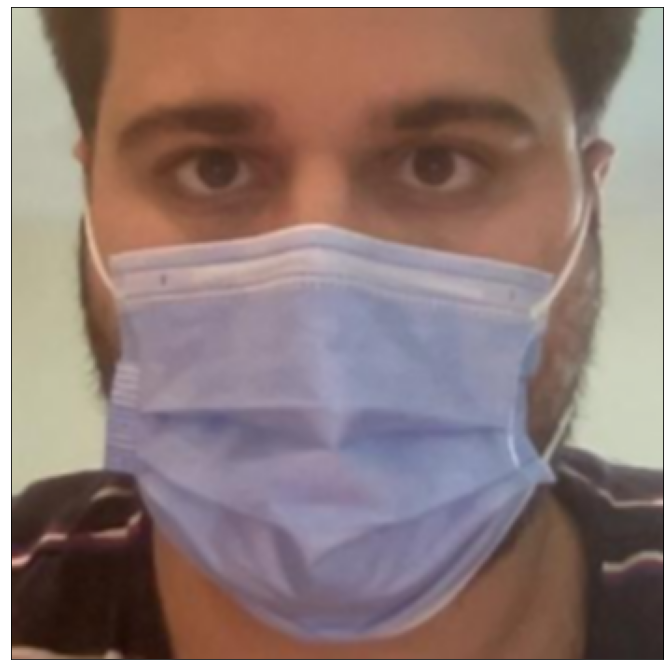

In [ ]:
idx = 1
for all_img, all_names in predict_dl:
    all_img = all_img.to(device)
    all_outputs = resnet18(all_img)
    _, prediction = torch.max(all_outputs, dim = 1)
    fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images = denorm(all_img.cpu())
    ax.imshow(make_grid(denorm_images[:idx], nrow=8).permute(1, 2, 0).clamp(0,1))
    for pre, n in zip(prediction[:idx], all_names[:idx]):
        if n == pre.cpu():
            print(colored(person_names[pre], 'green'))
        else:
            print(colored(person_names[pre], 'red'), colored(person_names[n], 'blue'))
    break

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns

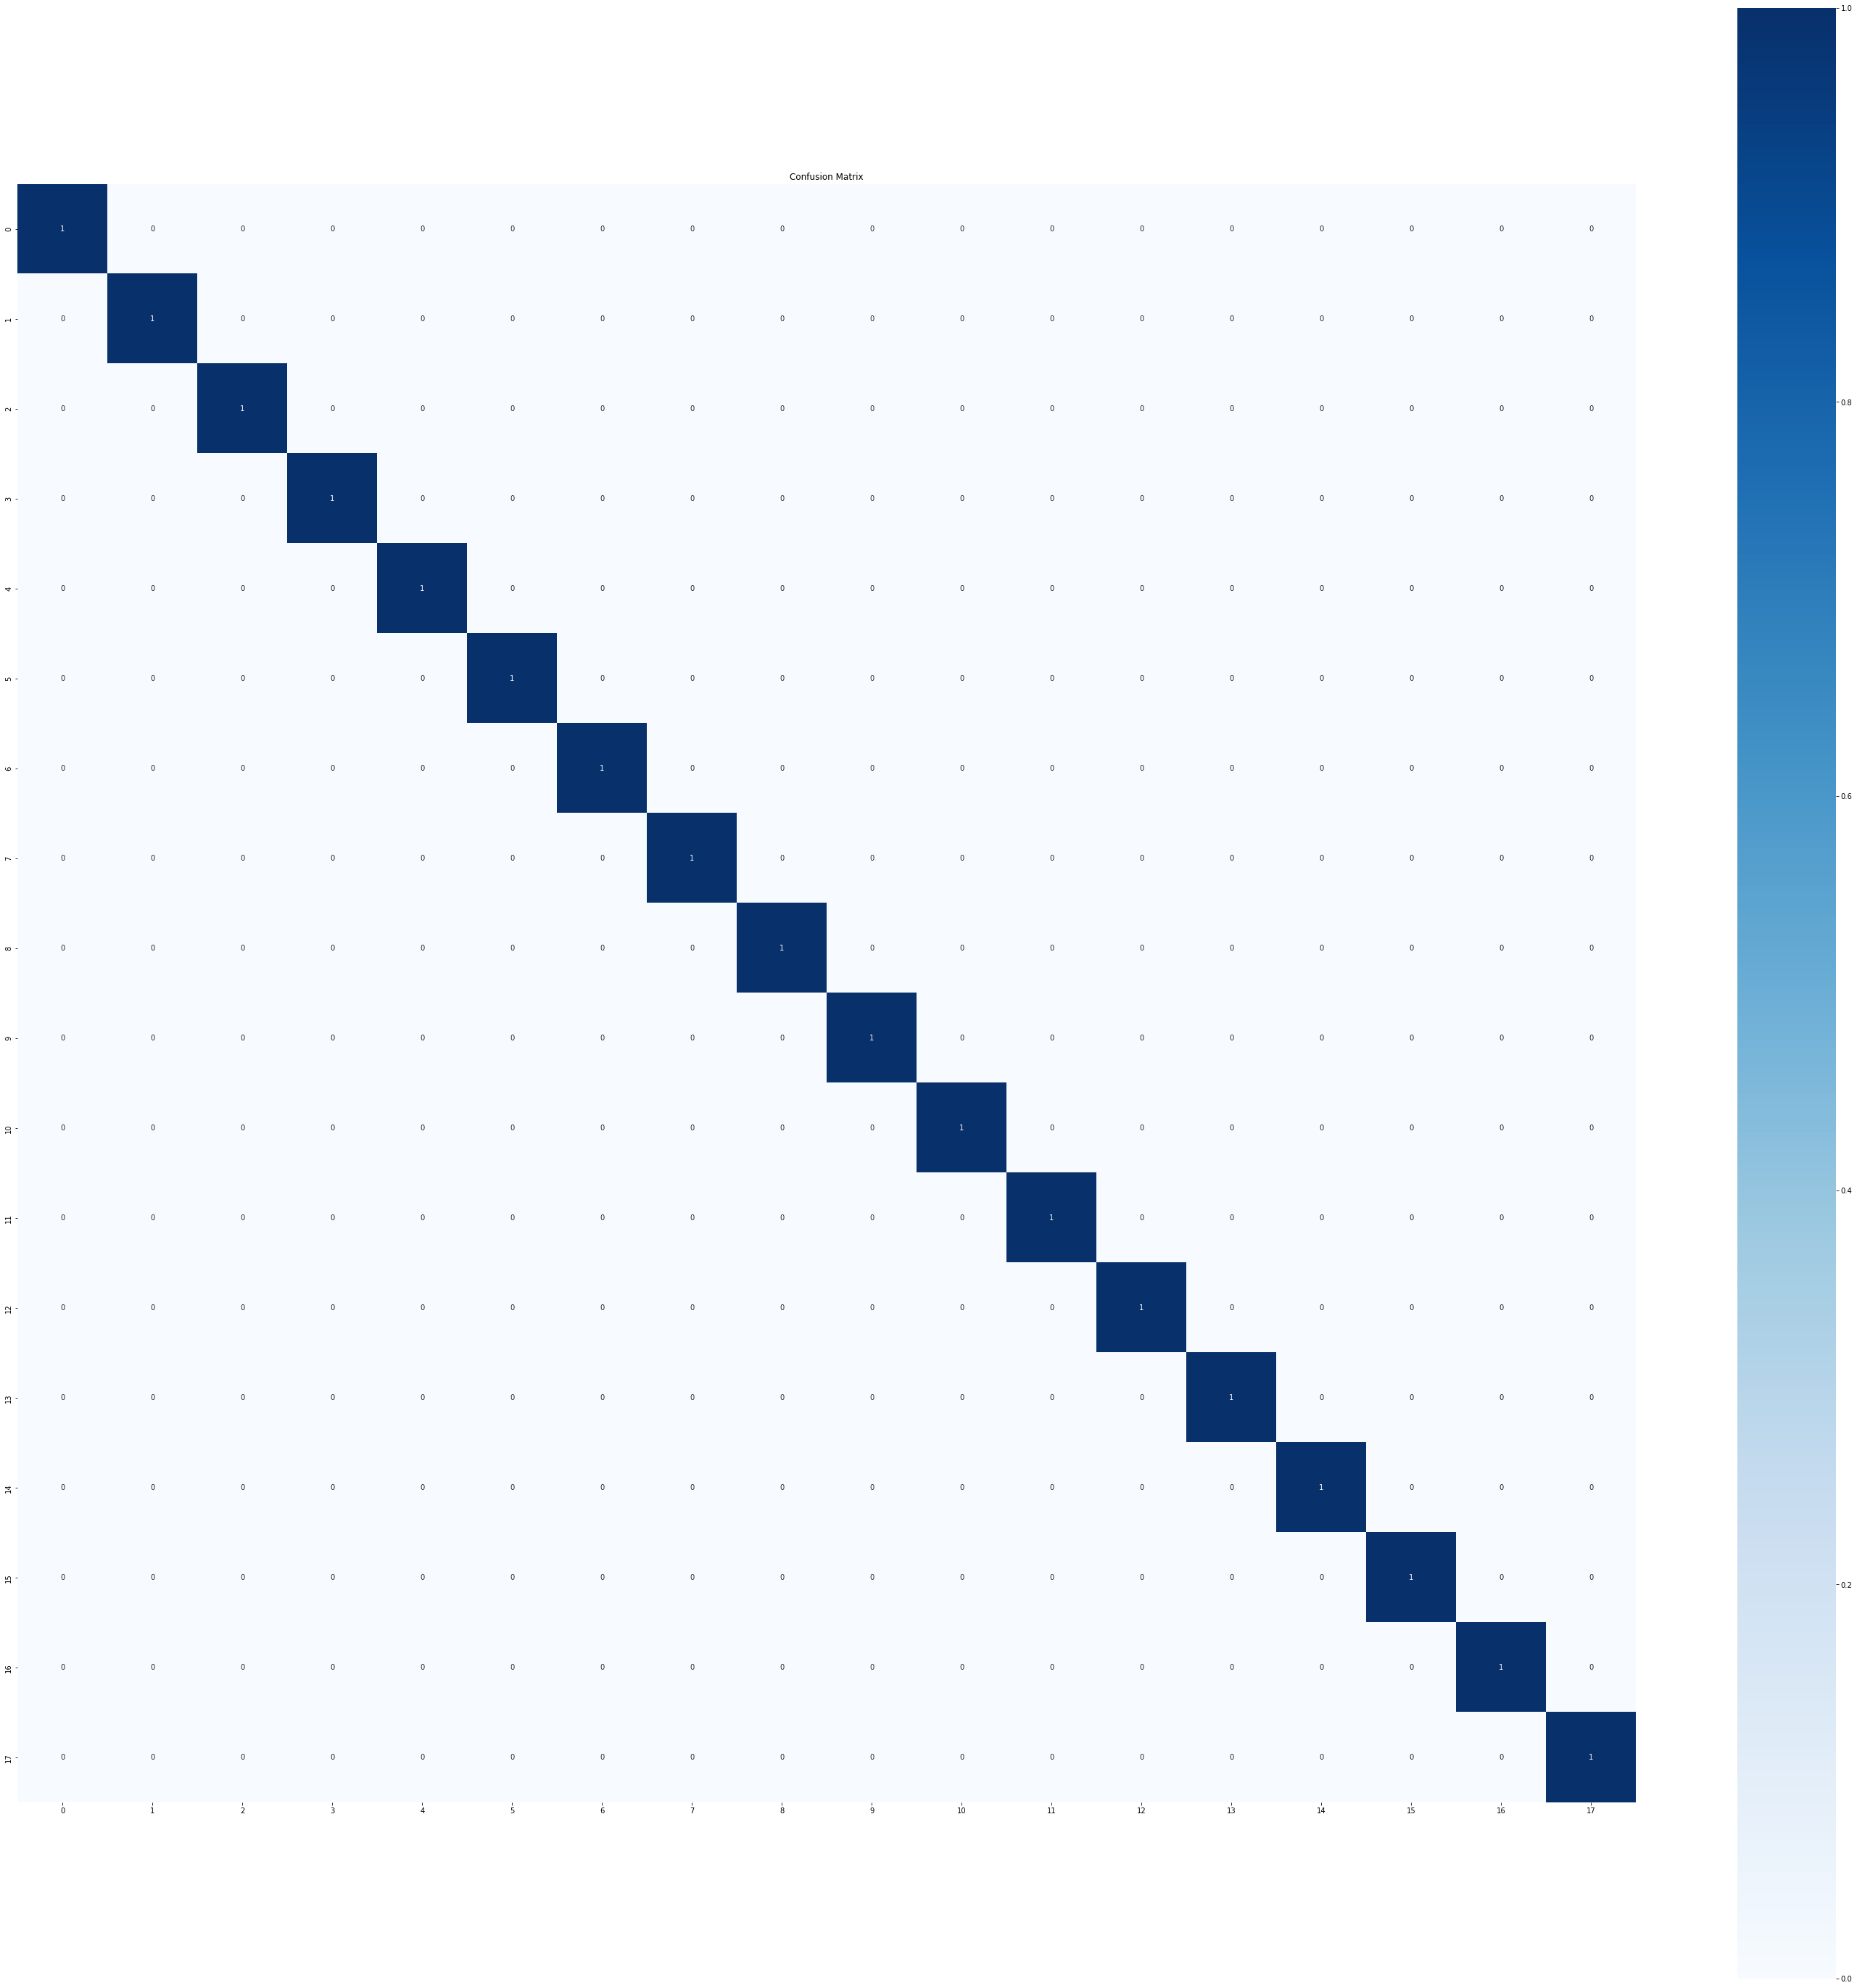

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
cm_df = pd.DataFrame(cm)
matplotlib.pyplot.figure(figsize=(50, 50))
matplotlib.pyplot.title('Confusion Matrix')
sns.heatmap(cm_df, annot=True, cmap='Blues', square=True);

In [ ]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         5
          17       1.00    

In this section of the report, we will talk about the SVM model and list down all the advantages and disadvantages of using the SVM model compared with the CNN approach for the Face recognition system. 
The image classification performance of the CNN model is doing well compared with SVM where the overall performance of the model indicates that the CNN model outperforms the SVM classification model for manually generated datasets, however, SVM has also performed well with accuracy as 94%. The performance metrics result shown in the table below demonstrates that CNN is performing well compared with the SVM model after evaluating model implementation with different criteria as mentioned 


## References 

Ahmedi, A. and Nandyal, S., 2015. An automatic attendance system using image processing. The International Journal Of Engineering And Science (IJES) [online], 4 (11), 1-8.

Anand, B., 2016. Face Recognition using SURF Features and SVM Classifier.

Charity, A., Okokpujie, K. and Etinosa, N., 2017. A bimodal biometrie student attendance system, 2017 IEEE 3rd International Conference on Electro-Technology for National Development (NIGERCON) (pp. 464-471).

Cortes, C. and Vapnik, V., 1995. Support-vector networks. Machine Learning [online], 20 (3), 273-297.

Gatsheni, B. N., Kuriakose, R. B. and Aghdasi, F., 2007. Automating a student class attendance register using radio frequency identification in South Africa, 2007 IEEE International Conference on Mechatronics (pp. 1-5): IEEE.

Jha, A., 2007. Class room attendance system using facial recognition system. The International journal of Mathematics, science, technology and Management [online], 2 (3), 4-7.

Kainz, O., Cymbalák, D., Lámer, J. and Jakab, F., 2014. Visual system for student attendance monitoring with non-standard situation detection, 2014 IEEE 12th IEEE International Conference on Emerging eLearning Technologies and Applications (ICETA) (pp. 221-226).

Lee, Y.-J., Yeh, Y.-R. and Pao, H.-K., 2012. Introduction to Support Vector Machines and Their Applications in Bankruptcy Prognosis. Handbook of Computational Finance [online].



Dlib. 2022. Classes — dlib documentation. [online] Available at: http://dlib.net/python/index.html#dlib.shape_predictor [Accessed 1 April 2022].

Dlib. 2022. Classes — dlib documentation. [online] Available at: http://dlib.net/python/index.html#dlib.get_frontal_face_detector [Accessed 2 April 2022].

Dlib. 2022. [online] Available at: http://dlib.net/face_landmark_detection.py.html [Accessed 2 April 2022].

OpenCV. 2022. OpenCV: Camera Calibration and 3D Reconstruction. [online] Available at: https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html [Accessed 3 April 2022].

OpenCV.org. 2022. OpenCV: Geometric Image Transformations. [online] Available at: https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html [Accessed 3 April 2022].

Dlib. 2022. Index of /files. [online] Available at: http://dlib.net/files/ [Accessed 2 April 2022]. (shape_predictor_68_face_landmarks.dat file)

Python. 2022. os — Miscellaneous operating system interfaces — Python 3.10.4 documentation. [online] Available at: https://docs.python.org/3/library/os.html [Accessed 3 April 2022].

Facial expression recognition based on Electroencephalogram and facial landmark localization - Scientific Figure on ResearchGate. 2019. Available from: https://www.researchgate.net/figure/The-face-shape-with-68-landmarks_fig3_330402357 [accessed 1 May, 2022]

OpenCV. 2022. OpenCV: Cascade Classifier. [online] Available at: https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html [Accessed 1 April 2022].